Student Name : Najmeh Mohajeri Student ID: 2422386

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_val, y_val) = fashion_mnist.load_data()

x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_val = x_val.reshape(-1, 28 * 28).astype('float32') / 255.0

y_train_cat = keras.utils.to_categorical(y_train)
y_val_cat = keras.utils.to_categorical(y_val)

print(x_train.shape)
print(x_val.shape)
print(y_train_cat.shape)
print(y_val_cat.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


# Task 1

Define one-layer model for fashion-mnist classification, train it for 15 epochs and plot training and validation accuracy asa function of epoch (you can copy this part from the example notebook).

In [3]:
# your code here
model1 = keras.models.Sequential()
model1.add(keras.layers.Input(shape=(28*28,)))
model1.add(keras.layers.Dense(10, activation='softmax'))
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
hist1 = model1.fit(x_train, y_train_cat, epochs=15, batch_size=64, validation_data=(x_val,y_val_cat))

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - acc: 0.5868 - loss: 1.2994 - val_acc: 0.7405 - val_loss: 0.7562
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.7769 - loss: 0.6982 - val_acc: 0.7836 - val_loss: 0.6552
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.7981 - loss: 0.6239 - val_acc: 0.7978 - val_loss: 0.6091
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8096 - loss: 0.5852 - val_acc: 0.8030 - val_loss: 0.5863
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.8200 - loss: 0.5513 - val_acc: 0.8091 - val_loss: 0.5657
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8249 - loss: 0.5344 - val_acc: 0.8165 - val_loss: 0.5501
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8289 - loss: 0.5224 - val_acc: 0.8170 - val_loss: 0.5410
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.8292 - loss: 0.5108 - val_acc: 0.8198 - val_loss: 0.5320
Epoch 9/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - ac

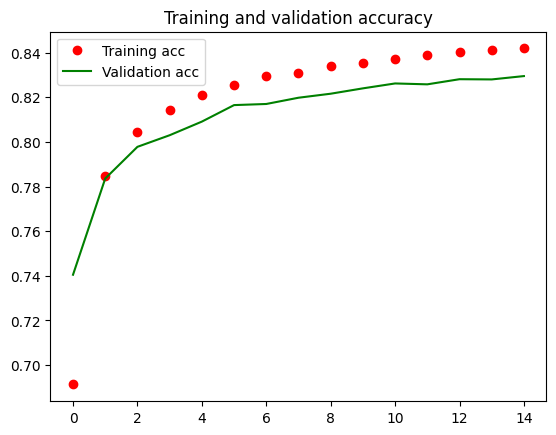

In [5]:
acc = hist1.history['acc']
val_acc = hist1.history['val_acc']
loss = hist1.history['loss']
val_loss = hist1.history['val_loss']

plt.plot(acc, 'ro', label='Training acc')
plt.plot(val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

## Answer 1
The results of Fashion MNIST have lower accuracy compared to MNIST, and considering the **82-84% accuracy**, a single-layer model is not suitable for classification in this dataset.

# Task 2

Define five-layer model for fashion-mnist classification, train it for 15 epochs and plot training and validation accuracy asa function of epoch (you can copy this part from the example notebook).

In [6]:
# your code here
model2 = keras.models.Sequential()
model2.add(keras.layers.Input(shape=(28*28,)))
model2.add(keras.layers.Dense(392, activation='relu'))
model2.add(keras.layers.Dense(196, activation='relu'))
model2.add(keras.layers.Dense(98, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))

model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 392)                 │         307,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 196)                 │          77,028 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 98)                  │          19,306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             990 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 405,044 (1.55 MB)

 Trainable params: 405,044 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
hist2 = model2.fit(x_train, y_train_cat, epochs=15, batch_size=64, validation_data=(x_val,y_val_cat))

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.6406 - loss: 1.1768 - val_acc: 0.7925 - val_loss: 0.5950
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - acc: 0.8109 - loss: 0.5457 - val_acc: 0.8154 - val_loss: 0.5151
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8309 - loss: 0.4802 - val_acc: 0.8228 - val_loss: 0.4969
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8456 - loss: 0.4447 - val_acc: 0.8416 - val_loss: 0.4482
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.8510 - loss: 0.4234 - val_acc: 0.8472 - val_loss: 0.4323
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8585 - loss: 0.4025 - val_acc: 0.8273 - val_loss: 0.4755
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.8641 - loss: 0.3891 - val_acc: 0.8482 - val_loss: 0.4235
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.8678 - loss: 0.3760 - val_acc: 0.8549 - val_loss: 0.4061
Epoch 9/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - ac

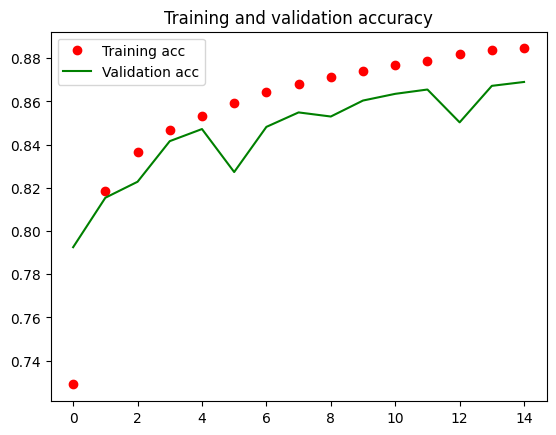

In [8]:
acc = hist2.history['acc']
val_acc = hist2.history['val_acc']
loss = hist2.history['loss']
val_loss = hist2.history['val_loss']

plt.plot(acc, 'ro', label='Training acc')
plt.plot(val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

# Answer 2

By increasing the number of layers, the model's accuracy improves, resulting in a better model for classification.

# Task 3

Try out batch normalisation for the five-layer model and report your findings.

In [9]:
# your code here
from tensorflow.keras.layers import BatchNormalization

model3 = keras.models.Sequential()
model3.add(keras.layers.Input(shape=(28*28,)))
model3.add(keras.layers.Dense(392, activation='relu'))
model3.add(BatchNormalization(axis=-1))
model3.add(keras.layers.Dense(196, activation='relu'))
model3.add(BatchNormalization(axis=-1))
model3.add(keras.layers.Dense(98, activation='relu'))
model3.add(BatchNormalization(axis=-1))
model3.add(keras.layers.Dense(10, activation='softmax'))

model3.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

model3.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 392)                 │         307,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 392)                 │           1,568 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 196)                 │          77,028 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 196)                 │             784 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 98)                  │          19,306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 98)                  │             392 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             990 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 407,788 (1.56 MB)

 Trainable params: 406,416 (1.55 MB)

 Non-trainable params: 1,372 (5.36 KB)

In [10]:
hist3 = model3.fit(x_train, y_train_cat, epochs=15, batch_size=64, validation_data=(x_val,y_val_cat))

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - acc: 0.7650 - loss: 0.7144 - val_acc: 0.8499 - val_loss: 0.4234
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - acc: 0.8608 - loss: 0.3929 - val_acc: 0.8603 - val_loss: 0.3913
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8801 - loss: 0.3400 - val_acc: 0.8557 - val_loss: 0.3903
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.8868 - loss: 0.3107 - val_acc: 0.8660 - val_loss: 0.3700
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8927 - loss: 0.2920 - val_acc: 0.8681 - val_loss: 0.3574
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9004 - loss: 0.2735 - val_acc: 0.8679 - val_loss: 0.3574
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9054 - loss: 0.2610 - val_acc: 0.8728 - val_loss: 0.3498
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.9121 - loss: 0.2426 - val_acc: 0.8787 - val_loss: 0.3427
Epoch 9/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - ac

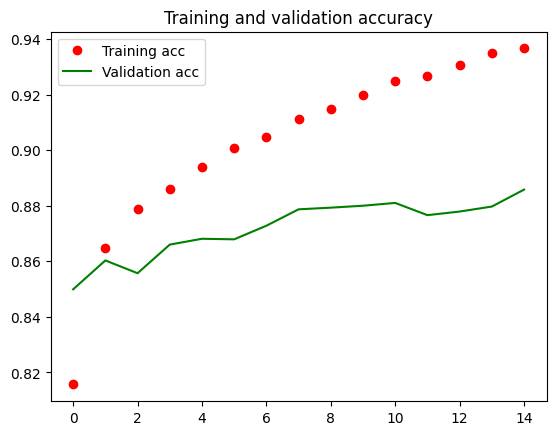

In [11]:
acc = hist3.history['acc']
val_acc = hist3.history['val_acc']
loss = hist3.history['loss']
val_loss = hist3.history['val_loss']

plt.plot(acc, 'ro', label='Training acc')
plt.plot(val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

# Answer 3
With the same number of layers and batch normalization, the accuracy of the training data increases significantly, but the validation accuracy does not change much.

# Task 4

Try out at least two combinations of number and width of layers and report your findings.

In [12]:
# your code here

model_width = keras.models.Sequential()
model_width.add(keras.layers.Input(shape=(28*28,)))
model_width.add(keras.layers.Dense(392, activation='relu'))
model_width.add(BatchNormalization(axis=-1))
model_width.add(keras.layers.Dense(392, activation='relu'))
model_width.add(BatchNormalization(axis=-1))
model_width.add(keras.layers.Dense(10, activation='softmax'))
model_width.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

model_width.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 392)                 │         307,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 392)                 │           1,568 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 392)                 │         154,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 392)                 │           1,568 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           3,930 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 468,842 (1.79 MB)

 Trainable params: 467,274 (1.78 MB)

 Non-trainable params: 1,568 (6.12 KB)

In [13]:
hist_width = model_width.fit(x_train, y_train_cat, epochs=15, batch_size=64, validation_data=(x_val,y_val_cat))

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.7817 - loss: 0.6324 - val_acc: 0.8535 - val_loss: 0.4240
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - acc: 0.8694 - loss: 0.3683 - val_acc: 0.8536 - val_loss: 0.4052
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8796 - loss: 0.3322 - val_acc: 0.8650 - val_loss: 0.3761
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8882 - loss: 0.3064 - val_acc: 0.8658 - val_loss: 0.3656
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8974 - loss: 0.2812 - val_acc: 0.8594 - val_loss: 0.3892
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9033 - loss: 0.2668 - val_acc: 0.8770 - val_loss: 0.3485
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.9113 - loss: 0.2478 - val_acc: 0.8728 - val_loss: 0.3462
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9169 - loss: 0.2335 - val_acc: 0.8740 - val_loss: 0.3528
Epoch 9/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - ac

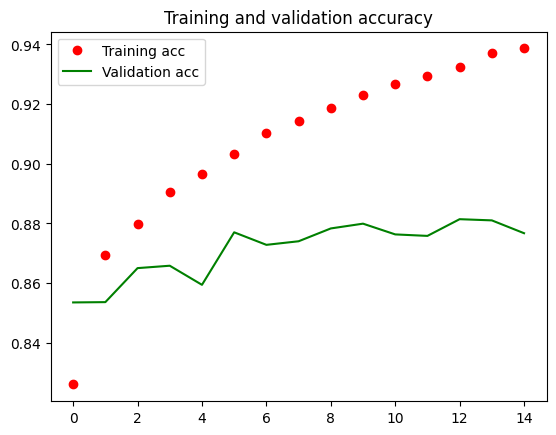

In [14]:
acc = hist_width.history['acc']
val_acc = hist_width.history['val_acc']
loss = hist_width.history['loss']
val_loss = hist_width.history['val_loss']

plt.plot(acc, 'ro', label='Training acc')
plt.plot(val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [15]:
model_depth = keras.models.Sequential()
model_depth.add(keras.layers.Input(shape=(28*28,)))
model_depth.add(keras.layers.Dense(392, activation='relu'))
model_depth.add(BatchNormalization(axis=-1))
model_depth.add(keras.layers.Dense(196, activation='relu'))
model_depth.add(BatchNormalization(axis=-1))
model_depth.add(keras.layers.Dense(98, activation='relu'))
model_depth.add(BatchNormalization(axis=-1))
model_depth.add(keras.layers.Dense(64, activation='relu'))
model_depth.add(BatchNormalization(axis=-1))
model_depth.add(keras.layers.Dense(32, activation='relu'))
model_depth.add(BatchNormalization(axis=-1))
model_depth.add(keras.layers.Dense(16, activation='relu'))
model_depth.add(BatchNormalization(axis=-1))
model_depth.add(keras.layers.Dense(10, activation='softmax'))
model_depth.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

model_depth.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 392)                 │         307,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 392)                 │           1,568 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 196)                 │          77,028 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 196)                 │             784 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 98)                  │          19,306 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 98)                  │             392 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           6,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 16)                  │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 416,360 (1.59 MB)

 Trainable params: 414,764 (1.58 MB)

 Non-trainable params: 1,596 (6.23 KB)

In [16]:
hist_depth = model_depth.fit(x_train, y_train_cat, epochs=15, batch_size=64, validation_data=(x_val,y_val_cat))

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - acc: 0.6973 - loss: 1.0137 - val_acc: 0.8285 - val_loss: 0.5062
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.8406 - loss: 0.4721 - val_acc: 0.8551 - val_loss: 0.4187
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.8622 - loss: 0.3997 - val_acc: 0.8594 - val_loss: 0.3957
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.8709 - loss: 0.3674 - val_acc: 0.8647 - val_loss: 0.3781
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.8820 - loss: 0.3357 - val_acc: 0.8672 - val_loss: 0.3721
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.8890 - loss: 0.3155 - val_acc: 0.8675 - val_loss: 0.3737
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.8877 - loss: 0.3087 - val_acc: 0.8747 - val_loss: 0.3583
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.8981 - loss: 0.2866 - val_acc: 0.8726 - val_loss: 0.3596
Epoch 9/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - a

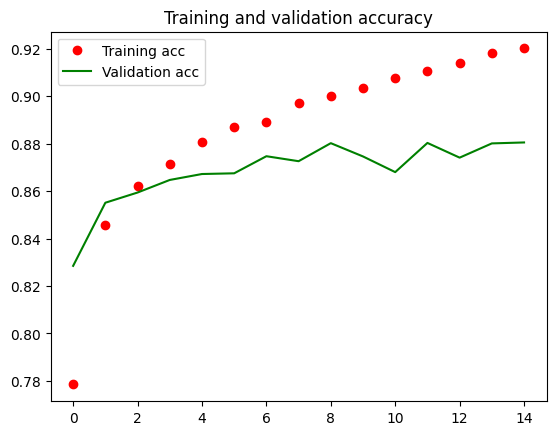

In [17]:
acc = hist_depth.history['acc']
val_acc = hist_depth.history['val_acc']
loss = hist_depth.history['loss']
val_loss = hist_depth.history['val_loss']

plt.plot(acc, 'ro', label='Training acc')
plt.plot(val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

# Answer 4

A model with more neurons achieves higher accuracy during the training phase compared to a model with more hidden layers. However, there is still no significant difference in validation accuracy.

# Task 5

Try out at least two regularisation techniques and report your findings.

In [22]:
# your code here
model_l5 = keras.models.Sequential()
model_l5.add(keras.layers.Input(shape=(28*28,)))
model_l5.add(keras.layers.Dense(128, activation='relu' ,kernel_regularizer=keras.regularizers.l2(0.02)))
model_l5.add(BatchNormalization(axis=-1))
model_l5.add(keras.layers.Dense(64, activation='relu' ,kernel_regularizer=keras.regularizers.l2(0.02)))
model_l5.add(BatchNormalization(axis=-1))
model_l5.add(keras.layers.Dense(10, activation='softmax'))

model_l5.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

hist_l5 = model_l5.fit(x_train, y_train_cat, epochs=15, batch_size=64, validation_data=(x_val,y_val_cat))




Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - acc: 0.7364 - loss: 5.9352 - val_acc: 0.8379 - val_loss: 3.3675
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8498 - loss: 2.8665 - val_acc: 0.8310 - val_loss: 1.8679
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.8674 - loss: 1.5459 - val_acc: 0.8307 - val_loss: 1.1402
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8663 - loss: 0.9574 - val_acc: 0.7950 - val_loss: 0.8870
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8645 - loss: 0.6848 - val_acc: 0.8222 - val_loss: 0.7192
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8632 - loss: 0.5648 - val_acc: 0.8019 - val_loss: 0.7152
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8638 - loss: 0.5066 - val_acc: 0.8233 - val_loss: 0.6326
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - acc: 0.8673 - loss: 0.4706 - val_acc: 0.8232 - val_loss: 0.5993
Epoch 9/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - ac

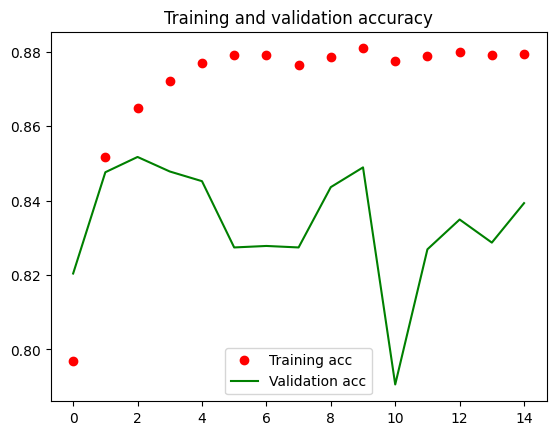

In [19]:
acc = hist_l5.history['acc']
val_acc = hist_l5.history['val_acc']
loss = hist_l5.history['loss']
val_loss = hist_l5.history['val_loss']

plt.plot(acc, 'ro', label='Training acc')
plt.plot(val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()


In [20]:
from keras.layers import Dropout
model_l6 = keras.models.Sequential()
model_l6.add(keras.layers.Input(shape=(28*28,)))
model_l6.add(keras.layers.Dense(128, activation='relu'))
model_l6.add(BatchNormalization(axis=-1))
model_l6.add(Dropout(0.5))
model_l6.add(keras.layers.Dense(64, activation='relu'))
model_l6.add(BatchNormalization(axis=-1))
model_l6.add(Dropout(0.5))
model_l6.add(keras.layers.Dense(10, activation='softmax'))

model_l6.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['acc'])

hist_l6 = model_l6.fit(x_train, y_train_cat, epochs=15, batch_size=64, validation_data=(x_val,y_val_cat))

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - acc: 0.5519 - loss: 1.3882 - val_acc: 0.7942 - val_loss: 0.5625
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.7419 - loss: 0.7409 - val_acc: 0.8125 - val_loss: 0.5118
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.7736 - loss: 0.6547 - val_acc: 0.8266 - val_loss: 0.4762
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.7921 - loss: 0.6054 - val_acc: 0.8319 - val_loss: 0.4609
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8035 - loss: 0.5735 - val_acc: 0.8331 - val_loss: 0.4526
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.8050 - loss: 0.5565 - val_acc: 0.8340 - val_loss: 0.4442
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8150 - loss: 0.5329 - val_acc: 0.8379 - val_loss: 0.4429
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.8163 - loss: 0.5268 - val_acc: 0.8432 - val_loss: 0.4253
Epoch 9/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - ac

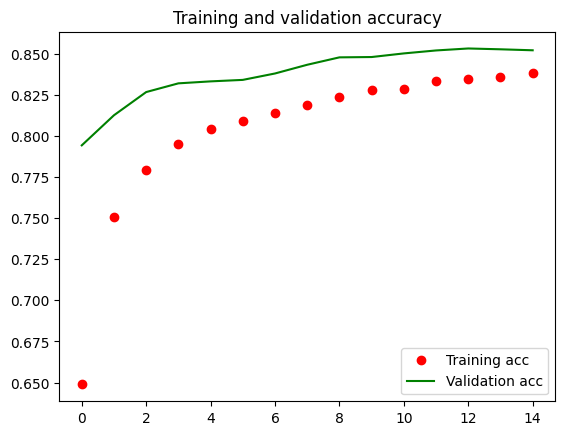

In [21]:
acc = hist_l6.history['acc']
val_acc = hist_l6.history['val_acc']
loss = hist_l6.history['loss']
val_loss = hist_l6.history['val_loss']

plt.plot(acc, 'ro', label='Training acc')
plt.plot(val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

# Answer 5

As expected, in the model with Dropout regularization, the training accuracy is lower than the validation accuracy. However, we added regularization to prevent overfitting. The L2 validation results are not interpretable for me—I cannot conclude from this figure whether overfitting has been reduced.